# Temperature Forecast Project using ML

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

**Problem Statement**

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Please note that there are two **target variables** here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

### Importing Libraries

In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore 
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import rainbow

import warnings
warnings.filterwarnings('ignore')

In [60]:
Tdf = pd.read_csv('Temperature_data.txt' , sep =',')

In [61]:
Tdf.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


### Exploratory Data Analysis (EDA)

In [62]:
Tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


From above we can observe that there are Null values in features , We can drop the index having Null values as the dataset is large and Null values present is very less . 

In [63]:
Tdf.dropna(inplace = True , axis = 0)

In [64]:
Tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


From above info we can observe that Date is not in datetime format , So we'll convert it to datetime and create new features as Year , Month , Day.  

### Data Preprocessing

#### Date

In [65]:
Tdf['Date'].value_counts()

04-08-2017    25
18-08-2015    25
20-08-2014    25
03-08-2015    25
06-07-2016    25
              ..
13-08-2015    22
24-07-2015    22
06-07-2017    22
23-08-2017    22
30-06-2017    16
Name: Date, Length: 307, dtype: int64

In [66]:
Tdf['Date'] = pd.to_datetime(Tdf['Date'])

#### Date (year)

In [67]:
Tdf['Year'] = Tdf['Date'].dt.year

In [68]:
Tdf['Year'].value_counts()

2014    1547
2015    1533
2013    1510
2017    1506
2016    1492
Name: Year, dtype: int64

Encoding year feature we have created as it has years in it. 

In [69]:
le = LabelEncoder()
Tdf['Year'] = le.fit_transform(Tdf['Year'])

In [70]:
Tdf['Year'].value_counts()

1    1547
2    1533
0    1510
4    1506
3    1492
Name: Year, dtype: int64

#### Date (month)

In [71]:
Tdf['Month'] = Tdf['Date'].dt.month

In [72]:
Tdf['Month'].value_counts()

7     2584
8     2446
6      360
1      249
4      248
3      247
9      247
12     247
11     246
2      246
5      246
10     222
Name: Month, dtype: int64

#### Date (Day)

In [73]:
Tdf['Day'] = Tdf['Date'].dt.day

In [74]:
Tdf['Day'].value_counts()

7     1484
8     1455
30     366
19     250
27     250
21     249
16     249
17     249
15     248
28     248
22     248
29     248
14     247
26     247
18     246
25     245
13     245
24     245
23     245
20     225
31      99
Name: Day, dtype: int64

#### LDAPS_PPT

In [75]:
Tdf['LDAPS_PPT1'].value_counts()

0.000000    4789
0.001953      11
0.002604       5
0.001734       3
0.002199       2
            ... 
0.020203       1
0.002677       1
0.935344       1
6.001337       1
0.163309       1
Name: LDAPS_PPT1, Length: 2779, dtype: int64

In [76]:
Tdf['LDAPS_PPT2'].value_counts()

0.000000    5094
0.001953       7
0.000781       3
0.000040       3
0.000014       2
            ... 
0.085236       1
0.041993       1
0.002633       1
0.039292       1
4.211753       1
Name: LDAPS_PPT2, Length: 2479, dtype: int64

In [77]:
Tdf['LDAPS_PPT3'].value_counts()

0.000000    5237
0.001953      10
0.000852       4
0.002604       3
0.000163       2
            ... 
0.718585       1
0.041803       1
0.398969       1
0.284441       1
0.011223       1
Name: LDAPS_PPT3, Length: 2326, dtype: int64

In [78]:
Tdf['LDAPS_PPT4'].value_counts()

0.000000    5690
0.001953       3
0.001105       2
0.000539       2
0.000046       2
            ... 
5.368769       1
0.113642       1
1.125897       1
0.391944       1
0.053507       1
Name: LDAPS_PPT4, Length: 1892, dtype: int64

By observing above data carefully we can observe that 

LDAPS_PPT model forecast of next-day split average precipitation has many values == 0 , So'll drop them as they can affect the accuracy of our model.

In [79]:
Tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 n

In [80]:
Tdf

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,0,6,30
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,0,6,30
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,0,6,30
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,0,6,30
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,0,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,4,8,30
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,4,8,30
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,4,8,30
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,4,8,30


#### Feature Selection

From above outputs we can feel the need to delete these features ('Date','LDAPS_PPT1', 'LDAPS_PPT2' , 'LDAPS_PPT3' , 'LDAPS_PPT4') or else they'll affect very much in our future predictions.

In [ ]:
Tdf = Tdf.drop(['Date','LDAPS_PPT1', 'LDAPS_PPT2' , 'LDAPS_PPT3' , 'LDAPS_PPT4'] , axis = 1)

#### Visualising and removing Outliers

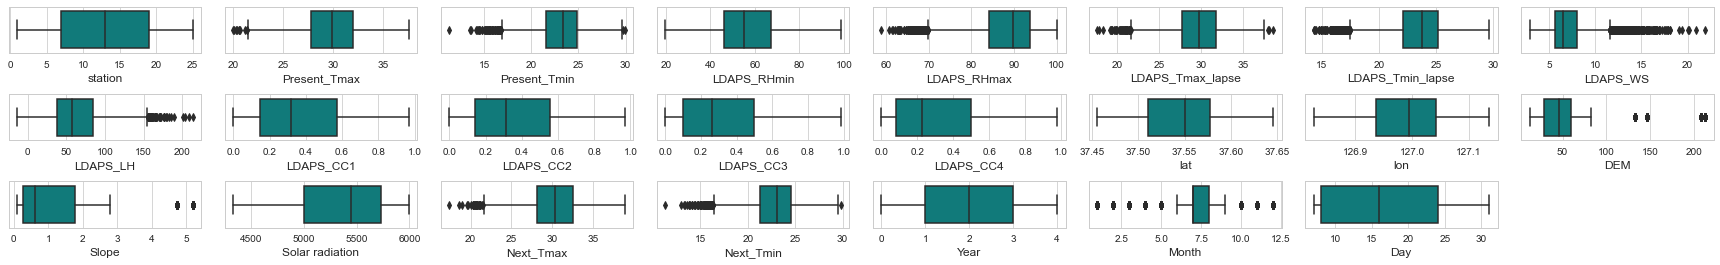

In [82]:
collist=Tdf.columns.values
ncol=8
nrows=20
plt.figure(figsize=(24,24))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(Tdf[collist[i]],color='darkcyan',orient="V")
    plt.tight_layout()

From above we can observe that there are outliers present in our data , so we'll remove them by using Z_score.

#### Zscore

Finding **ZScore**

A  **Z-score** is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean.

In [83]:
Z_score = np.abs(zscore(Tdf))

Tdf_wo = Dataframe without outliers 

In [84]:
Tdf_wo = Tdf[(Z_score<3).all(axis=1)]

In [85]:
print(Tdf.shape)
print(Tdf_wo.shape)

(7588, 23)
(7313, 23)


#### Predictor & Target Variables

In [86]:
Tdf_wo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7313 entries, 0 to 7749
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7313 non-null   float64
 1   Present_Tmax      7313 non-null   float64
 2   Present_Tmin      7313 non-null   float64
 3   LDAPS_RHmin       7313 non-null   float64
 4   LDAPS_RHmax       7313 non-null   float64
 5   LDAPS_Tmax_lapse  7313 non-null   float64
 6   LDAPS_Tmin_lapse  7313 non-null   float64
 7   LDAPS_WS          7313 non-null   float64
 8   LDAPS_LH          7313 non-null   float64
 9   LDAPS_CC1         7313 non-null   float64
 10  LDAPS_CC2         7313 non-null   float64
 11  LDAPS_CC3         7313 non-null   float64
 12  LDAPS_CC4         7313 non-null   float64
 13  lat               7313 non-null   float64
 14  lon               7313 non-null   float64
 15  DEM               7313 non-null   float64
 16  Slope             7313 non-null   float64


In [87]:
x = Tdf_wo.drop(['Next_Tmax' , 'Next_Tmin'] , axis = 1)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,1.616969e-01,0.130928,37.6046,126.991,212.3350,2.7850,5992.895996,0,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,1.594441e-01,0.127727,37.6046,127.032,44.7624,0.5141,5869.312500,0,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,2.040915e-01,0.142125,37.5776,127.058,33.3068,0.2661,5863.555664,0,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,1.611574e-01,0.134249,37.6450,127.022,45.7160,2.5348,5856.964844,0,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,1.788925e-01,0.170021,37.5507,127.135,35.0380,0.5055,5859.552246,0,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.000000e+00,0.004380,37.5507,127.040,26.2980,0.5721,4456.024414,4,8,30
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,5.850000e-07,0.017678,37.5102,127.086,21.9668,0.1332,4441.803711,4,8,30
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000e+00,0.000000,37.5372,126.891,15.5876,0.1554,4443.313965,4,8,30
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000e+00,0.000000,37.5237,126.909,17.2956,0.2223,4438.373535,4,8,30


In [88]:
y = Tdf_wo.iloc[: , 18:20]
y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7745,27.6,17.7
7746,28.0,17.1
7747,28.3,18.1
7748,28.6,18.8


#### Checking for skewness and remomving skewness

Checking for skewness in our dataset if theres any .

In [89]:
x.skew()

station             0.000561
Present_Tmax       -0.218955
Present_Tmin       -0.204771
LDAPS_RHmin         0.282072
LDAPS_RHmax        -0.753149
LDAPS_Tmax_lapse   -0.094445
LDAPS_Tmin_lapse   -0.360139
LDAPS_WS            1.017298
LDAPS_LH            0.595527
LDAPS_CC1           0.479447
LDAPS_CC2           0.470163
LDAPS_CC3           0.635937
LDAPS_CC4           0.670096
lat                 0.105239
lon                -0.289089
DEM                 1.776824
Slope               1.598635
Solar radiation    -0.516509
Year                0.027147
Month              -0.695752
Day                 0.264464
dtype: float64

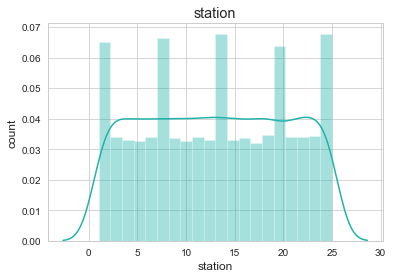

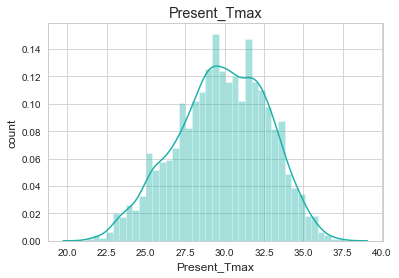

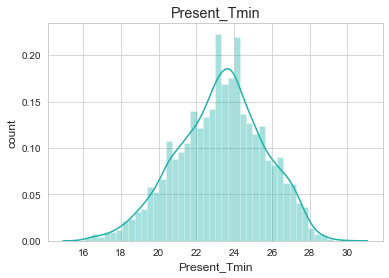

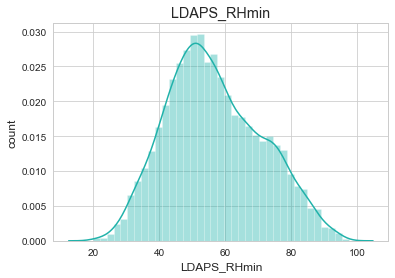

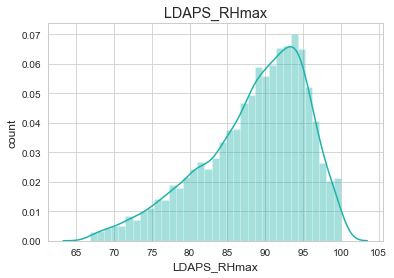

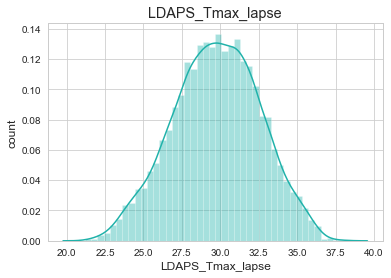

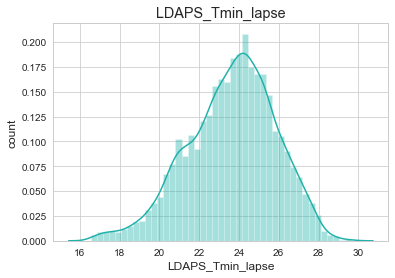

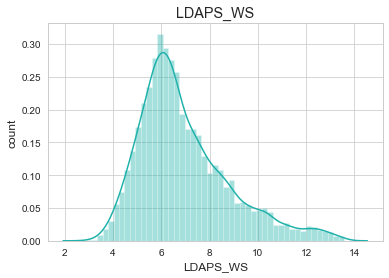

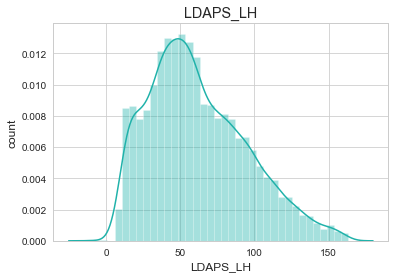

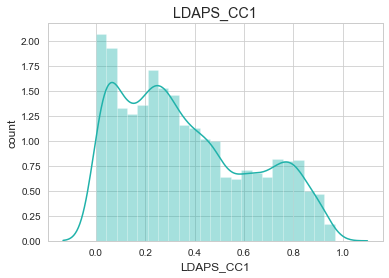

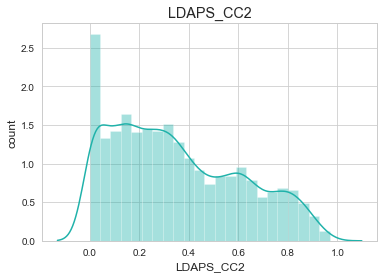

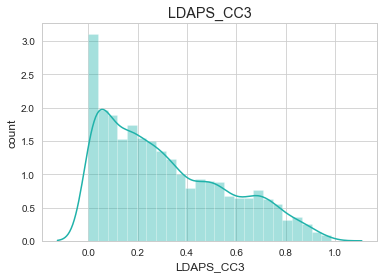

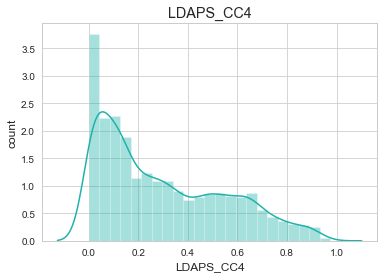

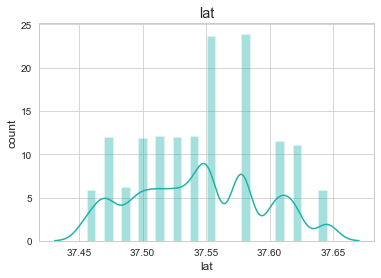

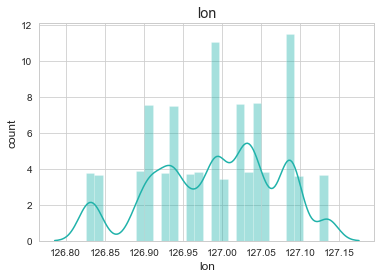

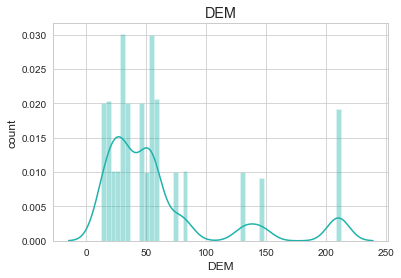

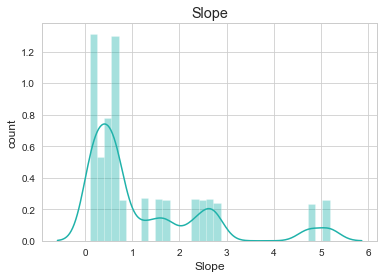

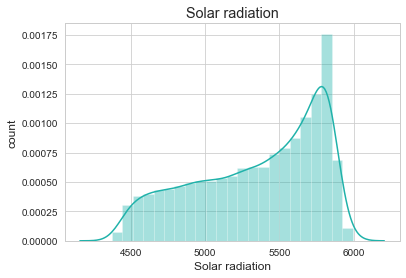

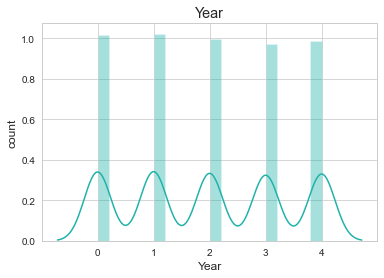

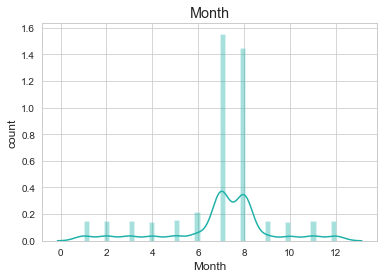

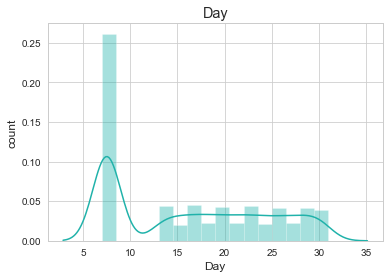

In [90]:
for feature in x :
    sns.distplot(x[feature] , kde = True ,color ='lightseagreen' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

Here we can observe that there is skewness in our dataset . 

So we will use **QuantileTransformer** for transforming/removing skewness from our dataset .

[To_learn_about_QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)

In [91]:
from sklearn.preprocessing import QuantileTransformer
powert = QuantileTransformer(n_quantiles = 1000 , output_distribution='uniform' )
x_t = powert.fit_transform(x)

In [92]:
x_trans = pd.DataFrame(x_t , columns = x.columns)
x_trans

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,0.000000,0.336336,0.209710,0.579831,0.577707,0.282553,0.361569,0.576963,0.635256,0.374150,...,0.342318,0.358609,0.846346,0.441441,0.967968,0.905906,1.000000,0.0,0.187688,0.963964
1,0.057558,0.739239,0.233734,0.422345,0.543510,0.505925,0.540019,0.258817,0.441513,0.360272,...,0.338018,0.351548,0.846346,0.656657,0.463964,0.383884,0.974975,0.0,0.187688,0.963964
2,0.098599,0.703704,0.477978,0.317743,0.237383,0.539955,0.643075,0.393449,0.095337,0.332544,...,0.415853,0.385229,0.675676,0.778779,0.383884,0.222222,0.966712,0.0,0.187688,0.963964
3,0.138639,0.752252,0.497998,0.579537,0.908740,0.486378,0.413125,0.248529,0.602443,0.345443,...,0.341521,0.366232,1.000000,0.556056,0.490490,0.825826,0.956803,0.0,0.187688,0.963964
4,0.178178,0.677678,0.267768,0.527079,0.519178,0.409991,0.438451,0.271002,0.896927,0.257770,...,0.374077,0.431066,0.498498,0.960961,0.423423,0.343343,0.962019,0.0,0.187688,0.963964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,0.816817,0.009009,0.011011,0.002348,0.100754,0.251179,0.015052,0.528170,0.006859,0.110502,...,0.000000,0.050841,0.498498,0.679680,0.222723,0.424424,0.010010,1.0,0.712713,0.963964
7309,0.857357,0.003504,0.007007,0.014681,0.230194,0.147400,0.009961,0.281245,0.738914,0.134327,...,0.009017,0.096187,0.282783,0.894895,0.181682,0.059560,0.005005,1.0,0.712713,0.963964
7310,0.897898,0.013514,0.004505,0.005396,0.111665,0.122650,0.021666,0.396936,0.657524,0.063743,...,0.000000,0.000000,0.445946,0.082583,0.042543,0.141141,0.006006,1.0,0.712713,0.963964
7311,0.939439,0.013514,0.009510,0.001937,0.082778,0.173157,0.021027,0.509524,0.378119,0.074791,...,0.000000,0.000000,0.364364,0.140641,0.100601,0.181682,0.003003,1.0,0.712713,0.963964


In [93]:
x_trans.skew()

station             0.002886
Present_Tmax        0.005291
Present_Tmin        0.001379
LDAPS_RHmin         0.000048
LDAPS_RHmax        -0.000003
LDAPS_Tmax_lapse   -0.000018
LDAPS_Tmin_lapse   -0.000019
LDAPS_WS            0.000007
LDAPS_LH            0.000009
LDAPS_CC1          -0.001552
LDAPS_CC2          -0.001185
LDAPS_CC3          -0.000808
LDAPS_CC4          -0.002684
lat                 0.145436
lon                -0.020215
DEM                -0.011363
Slope               0.003151
Solar radiation     0.000046
Year               -0.003756
Month              -0.024189
Day                -0.157290
dtype: float64

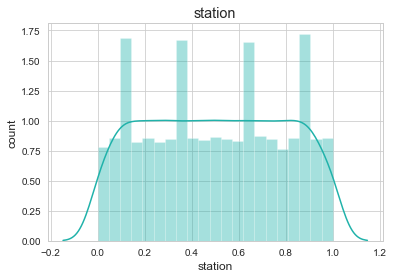

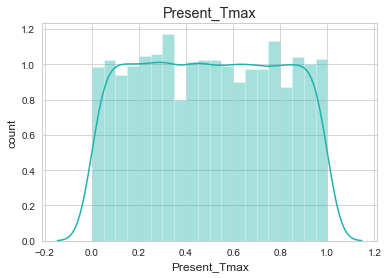

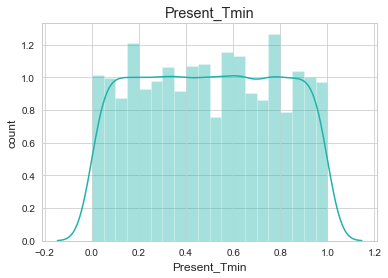

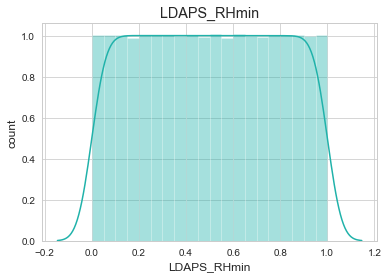

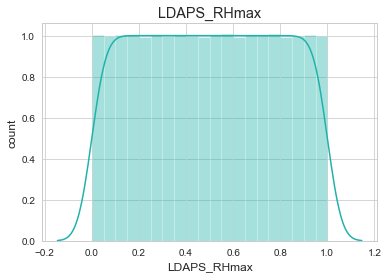

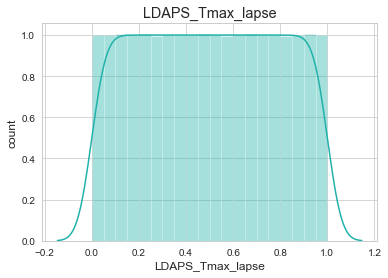

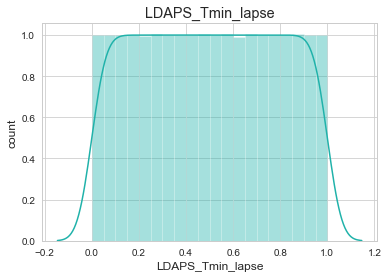

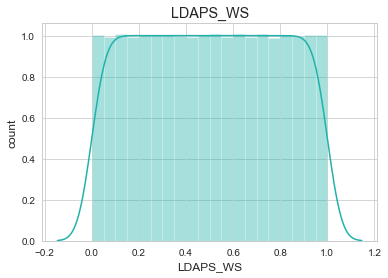

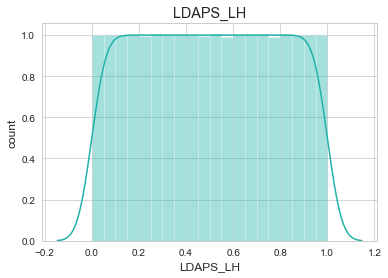

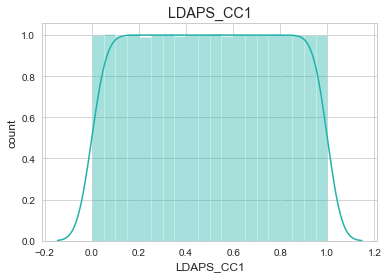

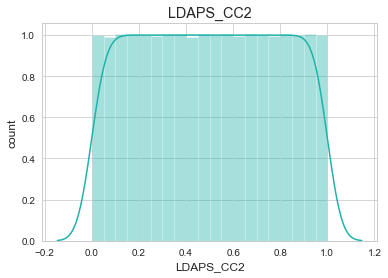

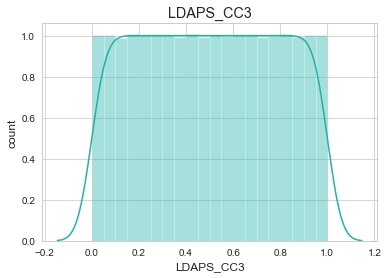

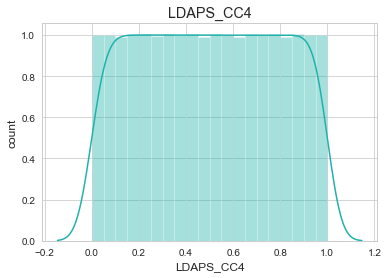

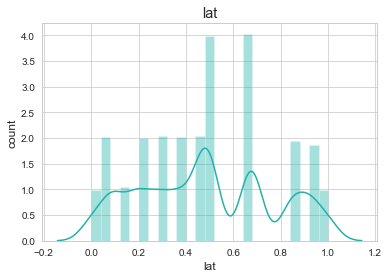

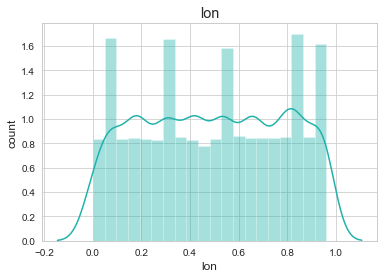

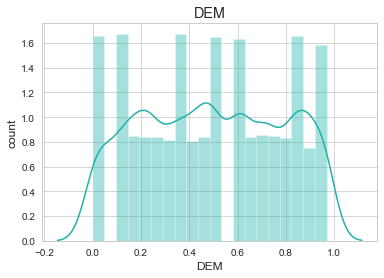

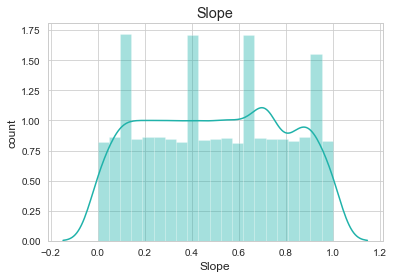

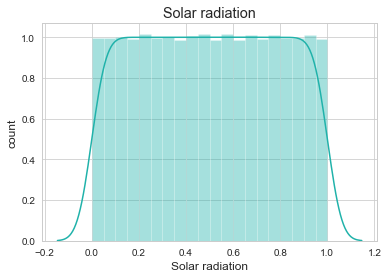

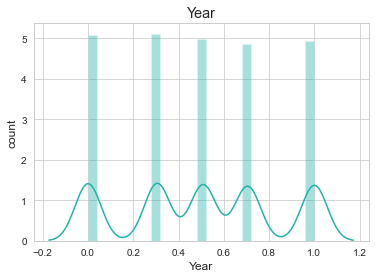

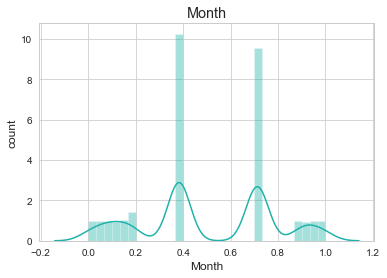

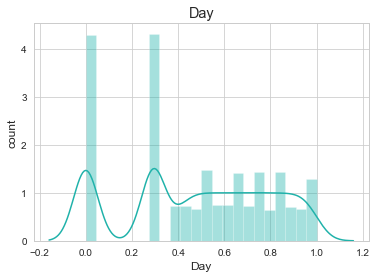

In [94]:
for feature in x_trans :
    sns.distplot(x_trans[feature] , kde = True ,color ='lightseagreen' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [97]:
x_trans.skew()

station             0.002886
Present_Tmax        0.005291
Present_Tmin        0.001379
LDAPS_RHmin         0.000048
LDAPS_RHmax        -0.000003
LDAPS_Tmax_lapse   -0.000018
LDAPS_Tmin_lapse   -0.000019
LDAPS_WS            0.000007
LDAPS_LH            0.000009
LDAPS_CC1          -0.001552
LDAPS_CC2          -0.001185
LDAPS_CC3          -0.000808
LDAPS_CC4          -0.002684
lat                 0.145436
lon                -0.020215
DEM                -0.011363
Slope               0.003151
Solar radiation     0.000046
Year               -0.003756
Month              -0.024189
Day                -0.157290
dtype: float64

#### Scaling

Gaussian's distribution with zero mean and unit variance is standard scaling.

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[-1.71807926, -0.56433188, -1.00494965, ..., -1.46272519,
        -1.11549055,  1.53506257],
       [-1.52034532,  0.8310054 , -0.92168941, ..., -1.46272519,
        -1.11549055,  1.53506257],
       [-1.37935242,  0.70793838, -0.07521033, ..., -1.46272519,
        -1.11549055,  1.53506257],
       ...,
       [ 1.36657018, -1.68233505, -1.71613084, ...,  1.46985907,
         0.75959714,  1.53506257],
       [ 1.5092825 , -1.68233505, -1.69878495, ...,  1.46985907,
         0.75959714,  1.53506257],
       [ 1.71733299, -1.6892684 , -1.7074579 , ...,  1.46985907,
         0.75959714,  1.53506257]])

In [99]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,-1.718079,-0.564332,-1.004950,0.276510,0.269146,-0.753175,-0.479486,0.266580,0.468465,-0.435436,...,-0.545892,-0.488857,1.295764,-0.178820,1.646225,1.403734,1.731817,-1.462725,-1.115491,1.535063
1,-1.520345,0.831005,-0.921689,-0.268969,0.150698,0.020517,0.138607,-0.835374,-0.202593,-0.483483,...,-0.560783,-0.513293,1.295764,0.566772,-0.102386,-0.396014,1.645137,-1.462725,-1.115491,1.535063
2,-1.379352,0.707938,-0.075210,-0.631277,-0.909614,0.138387,0.495561,-0.369053,-1.401626,-0.579475,...,-0.291253,-0.396728,0.690536,0.989852,-0.380218,-0.953367,1.616518,-1.462725,-1.115491,1.535063
3,-1.241798,0.876072,-0.005827,0.275490,1.415723,-0.047186,-0.300912,-0.871008,0.354811,-0.534820,...,-0.548652,-0.462473,1.840647,0.218251,-0.010353,1.127646,1.582195,-1.462725,-1.115491,1.535063
4,-1.105964,0.617805,-0.803737,0.093793,0.066422,-0.311770,-0.213191,-0.793169,1.374803,-0.838339,...,-0.435917,-0.238095,0.062235,1.621004,-0.243038,-0.535784,1.600261,-1.462725,-1.115491,1.535063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,1.088023,-1.697935,-1.693581,-1.723705,-1.382847,-0.861845,-1.679708,0.097578,-1.708087,-1.348176,...,-1.731270,-1.553992,0.062235,0.646533,-0.939357,-0.256245,-1.697220,1.469859,0.759597,1.535063
7309,1.227297,-1.717002,-1.707458,-1.680989,-0.934511,-1.221305,-1.697344,-0.757692,0.827503,-1.265695,...,-1.700047,-1.397060,-0.702731,1.392125,-1.081746,-1.514170,-1.714556,1.469859,0.759597,1.535063
7310,1.366570,-1.682335,-1.716131,-1.713148,-1.345052,-1.307031,-1.656799,-0.356973,0.545594,-1.510055,...,-1.731270,-1.729947,-0.124126,-1.422051,-1.564481,-1.232906,-1.711089,1.469859,0.759597,1.535063
7311,1.509282,-1.682335,-1.698785,-1.725128,-1.445106,-1.132091,-1.659013,0.032994,-0.422169,-1.471809,...,-1.731270,-1.729947,-0.413428,-1.220915,-1.363052,-1.093136,-1.721491,1.469859,0.759597,1.535063


#### Correlation 

<AxesSubplot:>

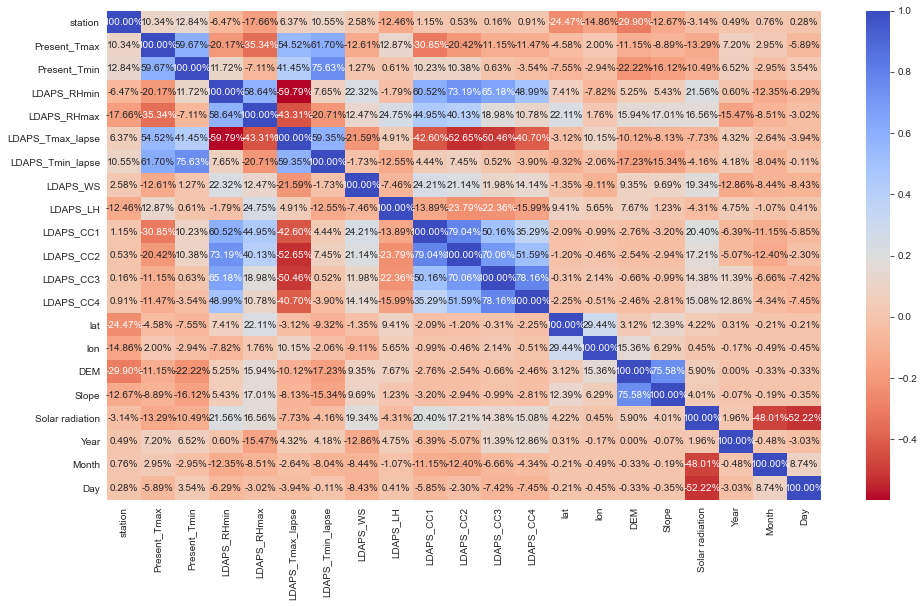

In [100]:
plt.figure(figsize = (16,9))
sns.heatmap(x_sc.corr() , annot = True , fmt = '.2%' , cmap = 'coolwarm_r')

In [101]:
y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7745,27.6,17.7
7746,28.0,17.1
7747,28.3,18.1
7748,28.6,18.8


From above we can observe that there is not much correlation between different predictor variables so we'll not require PCA here.

### Machine Learning Models

#### Finding the best Random State

In [102]:
best_score=0
for i in range(2200):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_sc, y, train_size = 0.7 , test_size = 0.3, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_predicted = lr.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 78.93958945752928 For Random state = 1296


In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5119, 21)
(2194, 21)
(5119, 2)
(2194, 2)


In [104]:
y_pred = pd.DataFrame(y_predicted)

In [105]:
y_pred

,0,1
0,29.622244,19.373276
1,31.569531,22.923282
2,29.382332,23.731727
3,31.199818,20.720461
4,31.453842,22.355532
...,...,...
2189,28.371805,19.805512
2190,34.532280,25.038437
2191,33.119175,25.221117
2192,31.602700,22.147827


In [109]:
X_train, X_test, y_train, y_test = train_test_split(x_sc , y, train_size=0.7, test_size=0.3, random_state= 1296)

model_reg = [LinearRegression , RandomForestRegressor, DecisionTreeRegressor , KNeighborsRegressor , ExtraTreesRegressor ,
             Lasso , Ridge , ElasticNet ]


for model in model_reg:
    m = model()
    print('\n''Model: ',m)
    m.fit(X_train, y_train)
    scr=m.score(X_train,y_train)
    score = (m.score(X_test , y_test))
    print('\n''-->''Score:',score)
    scr_cross=cross_val_score(m,x_sc,y,cv=5)
    scr_mean=scr_cross.mean()
    print('Cross validation score: ',scr_mean)
    print('Difference between accuracy and cross validation score: ', scr-scr_mean)
    y_predicted = m.predict(X_test)
    print('Mean Absolute Error: ',mean_absolute_error(y_test, y_predicted))
    print('R2 Score' , r2_score(y_test , y_predicted))


Model:  LinearRegression()

-->Score: 0.7893958945752928
Cross validation score:  0.6864389075872409
Difference between accuracy and cross validation score:  0.07889711045660619
Mean Absolute Error:  0.958065629693476
R2 Score 0.7893958945752928

Model:  RandomForestRegressor()

-->Score: 0.9023897133578924
Cross validation score:  0.6978258238774396
Difference between accuracy and cross validation score:  0.28691079811304454
Mean Absolute Error:  0.6393580218778491
R2 Score 0.9023897133578924

Model:  DecisionTreeRegressor()

-->Score: 0.7570919855005765
Cross validation score:  0.43326994331240354
Difference between accuracy and cross validation score:  0.5667300566875965
Mean Absolute Error:  0.9676390154968076
R2 Score 0.7570919855005765

Model:  KNeighborsRegressor()

-->Score: 0.8584494756063556
Cross validation score:  0.5542383684317358
Difference between accuracy and cross validation score:  0.34208362787702473
Mean Absolute Error:  0.7772470373746558
R2 Score 0.8584494756063

#### Accuracy Plots

Plotting Accuracies of different Algorithms to find the perfect one for our model.

In [111]:
model_reg = ['LinearRegression' , 'RandomForestRegressor','DecisionTreeRegressor','KNeighborsRegressor', 
             'ExtraTreesRegressor' ,'Lasso' , 'Ridge' , 'ElasticNet' ]

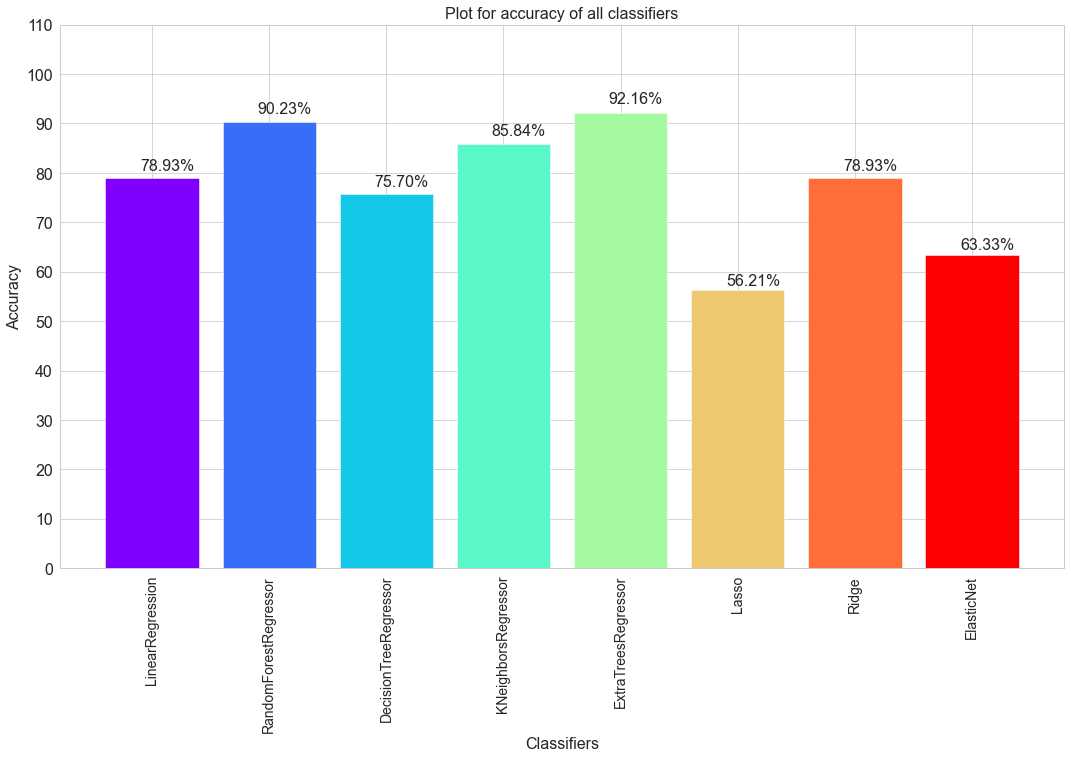

In [112]:

accuracies  = [78.93 , 90.23 , 75.70 , 85.84 , 92.16 , 56.21 , 78.93 , 63.33 ]

plt.figure(figsize = (18,10))
colors = rainbow(np.linspace(0, 1, len(model_reg)))
barplot = plt.bar(x = model_reg , height = accuracies , color = colors ,tick_label = model_reg)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 , 110], fontsize = 16)
plt.xticks(rotation = 90 ,  fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

From above we can observe that Extra Trees Regressor is giving us the best accuracy . So we'll use this algorithm only for our further predictions.

#### Training ExtraTrees Regressor again

In [ ]:
best_score=0
for i in range(200):
    
    X_train, X_test, y_train, y_test = train_test_split(x_sc, y, train_size = 0.7 , test_size = 0.3, random_state = i)
    
    etr = ExtraTreesRegressor()
    etr.fit(X_train,y_train)
    pred_etr = etr.predict(X_test)
    b_score= r2_score(y_test ,pred_etr)
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size = 0.3, random_state = 43)

etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
etr_pred=etr.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, etr_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, etr_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, etr_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, etr_pred))))

#### RegPlot

In [ ]:
sns.regplot(y_test, etr_pred , scatter = True , label = True , color = 'lightseagreen')

In [ ]:
import joblib
joblib.dump(etr , 'Extra Trees Regressor.pkl')